In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [37]:
X_train=X_train/255
X_test=X_test/255

In [38]:
X_train[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
X_train[7].shape


(28, 28)

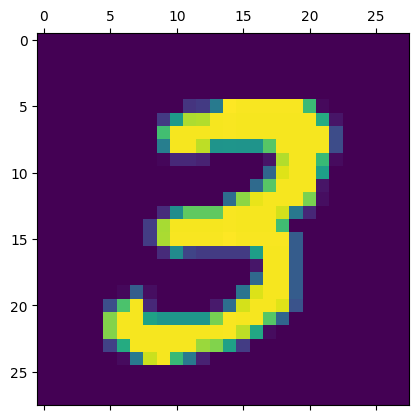

In [40]:
plt.matshow(X_train[7])

In [41]:
y_train[7]

3

In [42]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [43]:
X_train_flattened[6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [44]:
X_train_flattened[6].shape

(784,)

In [45]:
X_train[6].shape

(28, 28)

In [46]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 859us/step - loss: 0.4716 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.3046 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 811us/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 822us/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 817us/step - loss: 0.2668 - accuracy: 0.9257


In [53]:
model.predict(X_test_flattened)

313/313 [==============================] - 0s 674us/step


array([[3.7993874e-02, 1.7483228e-07, 6.5881811e-02, ..., 9.9976557e-01,
        9.1088124e-02, 6.8394685e-01],
       [5.1555145e-01, 3.0643637e-03, 9.9924463e-01, ..., 1.1032606e-12,
        1.7779066e-01, 4.6641819e-09],
       [4.5167192e-04, 9.9274760e-01, 6.4978182e-01, ..., 1.6183692e-01,
        3.4856918e-01, 5.8225617e-02],
       ...,
       [4.9039027e-06, 2.7028648e-06, 8.8362576e-04, ..., 1.7128074e-01,
        5.6911278e-01, 8.4129977e-01],
       [1.4879380e-04, 1.1862555e-04, 1.8317593e-04, ..., 3.5555135e-05,
        6.3839924e-01, 1.9817098e-04],
       [1.2729479e-02, 1.3737912e-10, 1.0738689e-01, ..., 1.4786538e-08,
        1.7591944e-04, 1.9928416e-06]], dtype=float32)

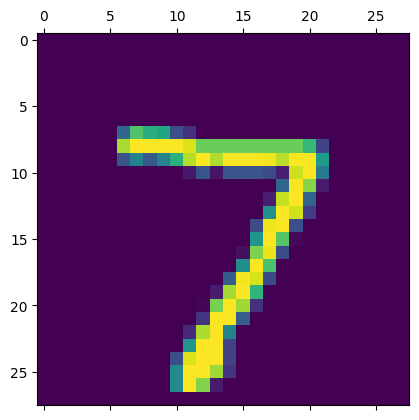

In [56]:
plt.matshow(X_test[0])

In [58]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [61]:
y_predicted[0]

array([3.7993874e-02, 1.7483228e-07, 6.5881811e-02, 9.5254833e-01,
       1.5981757e-03, 8.5288279e-02, 9.8938972e-07, 9.9976557e-01,
       9.1088124e-02, 6.8394685e-01], dtype=float32)

In [62]:
np.argmax(y_predicted[0])

7

In [66]:

y_labels = [np.argmax(i) for i in y_predicted]

In [67]:
y_labels[:5]

[7, 2, 1, 0, 4]

In [69]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    1,    0,    3,    3,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,    9,  913,   23,    7,    3,   10,   10,   43,    5],
       [   2,    0,   14,  937,    0,   13,    2,   10,   22,   10],
       [   2,    1,    3,    1,  894,    0,   10,    4,    9,   58],
       [  13,    1,    3,   48,   10,  750,   12,    6,   41,    8],
       [  15,    3,    7,    1,    7,   10,  910,    2,    3,    0],
       [   2,    5,   20,    8,    6,    0,    0,  938,    4,   45],
       [   9,    6,    6,   23,    9,   18,    7,   11,  875,   10],
       [  11,    7,    1,    9,   14,    4,    0,   14,    6,  943]])>

Text(95.72222222222221, 0.5, 'truth')

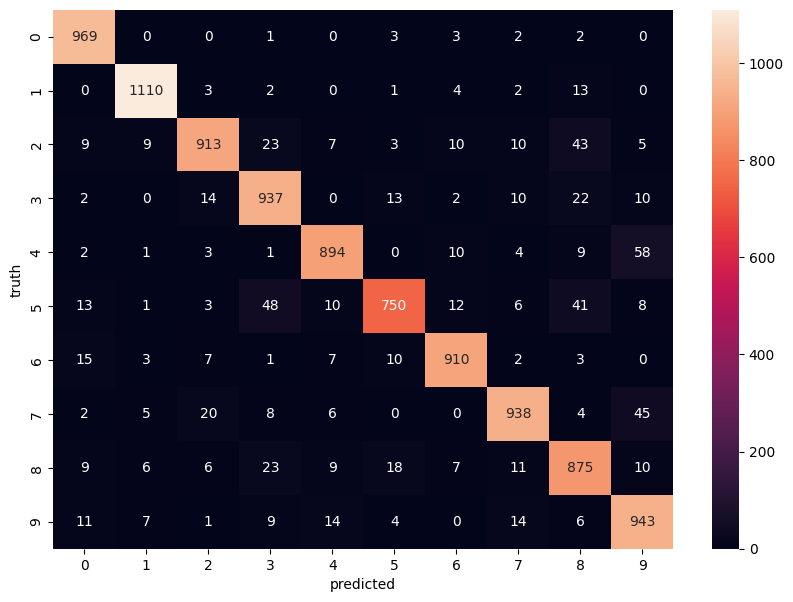

In [71]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [74]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, input_shape=(100,), activation='relu'),
    keras.layers.Dense(25, input_shape=(50,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2803 - accuracy: 0.9179
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1151 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0816 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0658 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0541 - accuracy: 0.9830


In [76]:
y_predicted=model.predict(X_test_flattened)
y_labels=[np.argmax(i) for i in y_predicted]
y_labels[:5]

313/313 [==============================] - 1s 3ms/step


[7, 2, 1, 0, 4]

In [77]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    1,    7,    0,    1,    2,    6,    1,    4,    2],
       [   0, 1130,    1,    0,    0,    0,    2,    1,    1,    0],
       [   2,    1, 1010,    4,    4,    0,    1,    5,    4,    1],
       [   0,    1,    6,  979,    0,    4,    0,    7,    5,    8],
       [   1,    1,    1,    0,  965,    0,    3,    4,    1,    6],
       [   3,    0,    1,   14,    2,  861,    1,    1,    4,    5],
       [   3,    3,    4,    0,    9,    5,  931,    0,    3,    0],
       [   1,    4,    8,    0,    2,    0,    0,  999,    2,   12],
       [   1,    4,    4,    1,    2,    5,    4,    1,  946,    6],
       [   2,    4,    0,    0,    9,    1,    0,    3,    2,  988]])>

Text(95.72222222222221, 0.5, 'predicted')

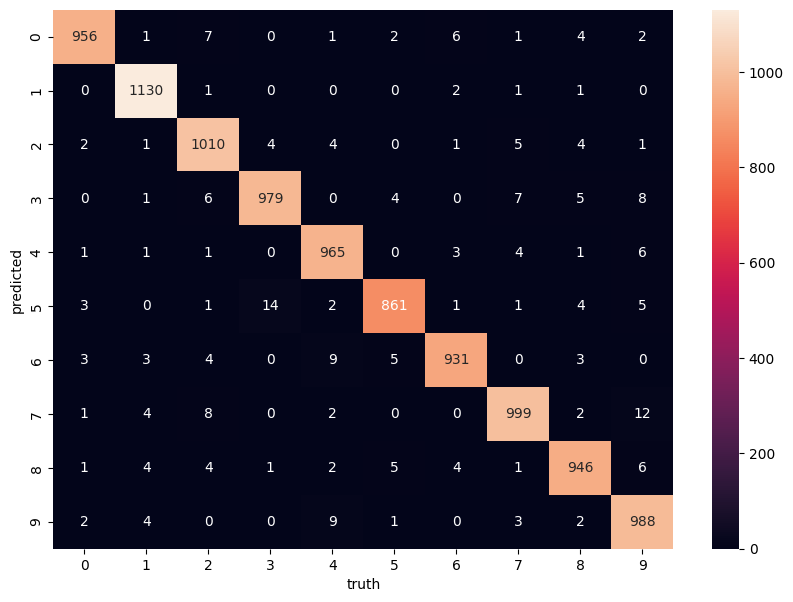

In [80]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("truth")
plt.ylabel("predicted")